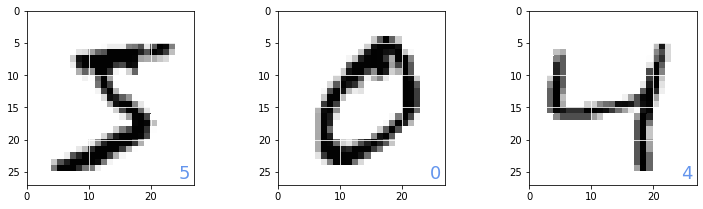

In [17]:
#MNIST를 피드포워드네트워크에 인식시키기
#피드포워드네트워크란? 한 방향으로만 흐르는 신경망

#케라스 MNIST DB 불러오기

from keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
#60000개의 훈련용 데이터에(x_train, y_train)에 저장되고
#10000개의 테스트용 데이터는 test에 저장된다.


import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1,figsize=(12,3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()
for id in range(3):
    plt.subplot(1,3,id+1) #그래프 3개 만들기
    img=x_train[id,:,:] #x_train에 있는 id대로 하나씩 
    plt.pcolor(255-img) #히트맵을 그린다.
    plt.text(24.5,26,"%d" % y_train[id], color='cornflowerblue',fontsize=18) 
    #폰트사이즈는 18, 색은 cornflowerblue(이건 아래에 구분되는것.)
    plt.xlim(0,27) #x축 범위
    plt.ylim(27,0) #y축 범위
    plt.grid('on',color='white') 
plt.show()

In [18]:
#2층 피드 포워드 네트워크 모델
from keras.utils import np_utils

x_train=x_train.reshape(60000,784)
x_train=x_train.astype('float32')
x_train=x_train/255
num_classes=10
y_train=np_utils.to_categorical(y_train,num_classes)
x_test=x_test.reshape(10000,784)
x_test=x_test.astype('float32')
x_test=x_test/255
y_test=np_utils.to_categorical(y_test,num_classes)

np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.optimizers import Adam

model=Sequential()
model.add(Dense(16,input_dim=784,activation='sigmoid')) #중간 히든레이어는 16개
model.add(Dense(10,activation='softmax')) #네트워크 출력층은 10개의 뉴런으로
model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])

import time
startTime=time.time()
history=model.fit(x_train,y_train,epochs=10,batch_size=1000,verbose=1,validation_data=(x_test,y_test)) #10번의 epoch 
score=model.evaluate(x_test,y_test,verbose=0)
print('Test loss:',score[0])
print('Test accuracy',score[1])
print('Computation time:[0:.3f]sec'.format(time.time()-startTime))
#아래의 결과는 10번의 epoch으로 1000개의 미니배치를 60번 iteration

Epoch 1/10
60/60 [==============================] - 1s 10ms/step - loss: 1.9665 - accuracy: 0.4990 - val_loss: 1.6587 - val_accuracy: 0.6937
Epoch 2/10
60/60 [==============================] - 0s 7ms/step - loss: 1.4905 - accuracy: 0.7444 - val_loss: 1.3148 - val_accuracy: 0.8064
Epoch 3/10
60/60 [==============================] - 1s 8ms/step - loss: 1.2095 - accuracy: 0.8103 - val_loss: 1.0818 - val_accuracy: 0.8369
Epoch 4/10
60/60 [==============================] - 1s 10ms/step - loss: 1.0129 - accuracy: 0.8352 - val_loss: 0.9153 - val_accuracy: 0.8537
Epoch 5/10
60/60 [==============================] - 1s 11ms/step - loss: 0.8696 - accuracy: 0.8494 - val_loss: 0.7923 - val_accuracy: 0.8640
Epoch 6/10
60/60 [==============================] - 1s 11ms/step - loss: 0.7621 - accuracy: 0.8606 - val_loss: 0.6994 - val_accuracy: 0.8699
Epoch 7/10
60/60 [==============================] - 1s 10ms/step - loss: 0.6788 - accuracy: 0.8695 - val_loss: 0.6267 - val_accuracy: 0.8779
Epoch 8/10
60/6

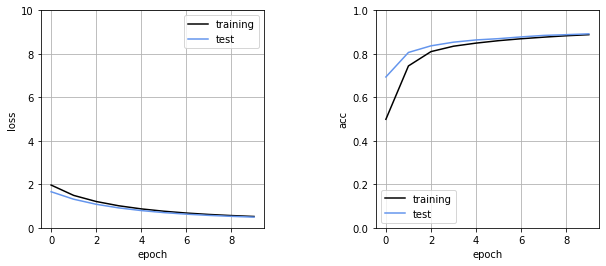

In [19]:
#위의 결과가 오버피팅이 일어나지 않았는지 확인해보자!
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1,figsize=(10,4))
plt.subplots_adjust(wspace=0.5)
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='training',color='black')
plt.plot(history.history['val_loss'],label='test',color='cornflowerblue')
plt.ylim(0,10)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],label='training',color='black')
plt.plot(history.history['val_accuracy'],label='test',color='cornflowerblue')
plt.ylim(0,1)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

#출력결과를 보면 오버피팅은 일어나지 않았다. 


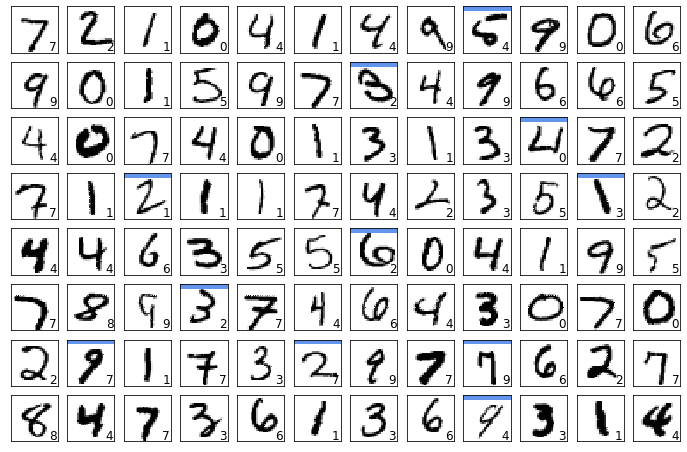

In [20]:
#그렇다면 89.51%의 정확도는 좋은 편일까요??
def show_prediction():
    n_show=96
    y=model.predict(x_test)
    plt.figure(2,figsize=(12,8))
    plt.gray()
    for i in range(n_show):
        plt.subplot(8,12,i+1)
        x=x_test[i,:]
        x=x.reshape(28,28)
        plt.pcolor(1-x)
        wk=y[i,:]
        prediction=np.argmax(wk)
        plt.text(22,25.5,"%d" % prediction, fontsize=12)
        if prediction!=np.argmax(y_test[i,:]):
            plt.plot([0,27],[1,1],color='cornflowerblue',linewidth=5)
        plt.xlim(0,27)
        plt.ylim(27,0)
        plt.xticks([],"")
        plt.yticks([],"")
show_prediction()
plt.show()
#아래의 결과는 x_test 전체에 대한 모델의 출력 y를 얻을 수 있다. 그중에서 처음 96개의 분량을 표시했다.
#그 중 10개나 틀린 결과를 나타내었다. 이는 만족스럽지 않은 결과다. 
#누가봐도 2인데 6으로 대답하는 경우도 있다.

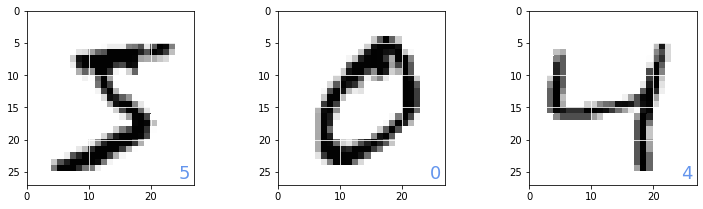

Epoch 1/10
60/60 [==============================] - 2s 34ms/step - loss: 1.4190 - accuracy: 0.6028 - val_loss: 0.7570 - val_accuracy: 0.8434
Epoch 2/10
60/60 [==============================] - 0s 6ms/step - loss: 0.5943 - accuracy: 0.8605 - val_loss: 0.4570 - val_accuracy: 0.8839
Epoch 3/10
60/60 [==============================] - 0s 8ms/step - loss: 0.4282 - accuracy: 0.8890 - val_loss: 0.3748 - val_accuracy: 0.8986
Epoch 4/10
60/60 [==============================] - 1s 12ms/step - loss: 0.3673 - accuracy: 0.9007 - val_loss: 0.3351 - val_accuracy: 0.9060
Epoch 5/10
60/60 [==============================] - 1s 12ms/step - loss: 0.3340 - accuracy: 0.9081 - val_loss: 0.3130 - val_accuracy: 0.9100
Epoch 6/10
60/60 [==============================] - 0s 6ms/step - loss: 0.3130 - accuracy: 0.9132 - val_loss: 0.2983 - val_accuracy: 0.9156
Epoch 7/10
60/60 [==============================] - 0s 5ms/step - loss: 0.2979 - accuracy: 0.9171 - val_loss: 0.2873 - val_accuracy: 0.9180
Epoch 8/10
60/60 

In [26]:
#Relu 활성화 함수를 사용해서 결과
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
#60000개의 훈련용 데이터에(x_train, y_train)에 저장되고
#10000개의 테스트용 데이터는 test에 저장된다.


import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1,figsize=(12,3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()
for id in range(3):
    plt.subplot(1,3,id+1) #그래프 3개 만들기
    img=x_train[id,:,:] #x_train에 있는 id대로 하나씩 
    plt.pcolor(255-img) #히트맵을 그린다.
    plt.text(24.5,26,"%d" % y_train[id], color='cornflowerblue',fontsize=18) 
    #폰트사이즈는 18, 색은 cornflowerblue(이건 아래에 구분되는것.)
    plt.xlim(0,27) #x축 범위
    plt.ylim(27,0) #y축 범위
    plt.grid('on',color='white') 
plt.show()
from keras.utils import np_utils

x_train=x_train.reshape(60000,784)
x_train=x_train.astype('float32')
x_train=x_train/255
num_classes=10
y_train=np_utils.to_categorical(y_train,num_classes)
x_test=x_test.reshape(10000,784)
x_test=x_test.astype('float32')
x_test=x_test/255
y_test=np_utils.to_categorical(y_test,num_classes)

np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.optimizers import Adam

model=Sequential()
model.add(Dense(16,input_dim=784,activation='relu')) #중간 히든레이어는 16개
model.add(Dense(10,activation='softmax')) #네트워크 출력층은 10개의 뉴런으로
model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])

import time
startTime=time.time()
history=model.fit(x_train,y_train,epochs=10,batch_size=1000,verbose=1,validation_data=(x_test,y_test)) #10번의 epoch 
score=model.evaluate(x_test,y_test,verbose=0)
print('Test loss:',score[0])
print('Test accuracy',score[1])
print('Computation time:[0:.3f]sec'.format(time.time()-startTime))
#정확도가 92%까지 올랐다.

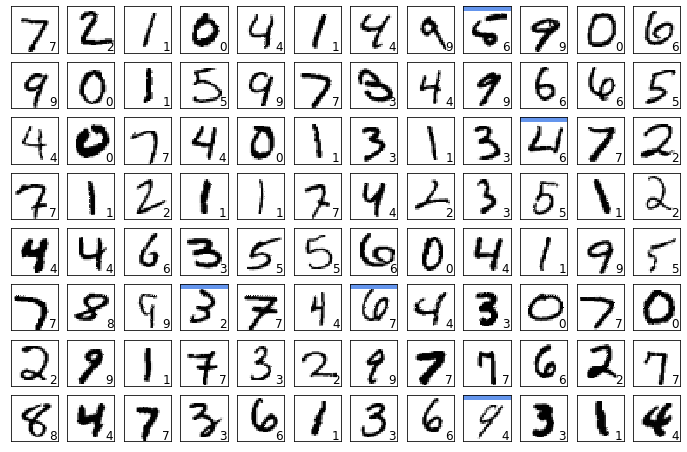

In [27]:
#위를 바탕으로 한번확인해봅시다
show_prediction()
plt.show()
#5개 틀린 것으로 줄었지만 여전히 누가봐도 3인데 2로 인식하는 경우를 확인할 수 있다. 


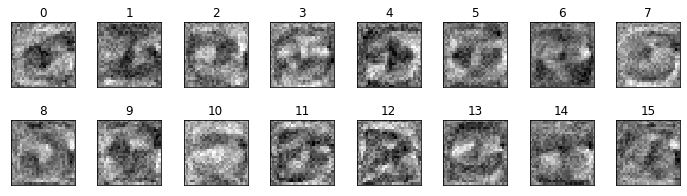

In [28]:
#1층째의 가중치 가시화
w=model.layers[0].get_weights()[0]
plt.figure(1,figsize=(12,3))
plt.gray()
plt.subplots_adjust(wspace=0.35,hspace=0.5)
for i in range(16):
    plt.subplot(2,8,i+1)
    w1=w[:,i]
    w1=w1.reshape(28,28)
    plt.pcolor(-w1)
    plt.xlim(0,27)
    plt.ylim(27,0)
    plt.xticks([],"")
    plt.yticks([],"")
    plt.title("%d" % i)
plt.show()
#검은 부분에 문자 일부분이 있으면 그 뉴런은 활성화하고 흰부분에 문자일부분이 있으면 억제된다.
#12번 뉴런의 가중치는 2의 형태가 검게 나타나고 있다.
#아마 2를 인식하는데 도움이 될 것이다. 

In [29]:
#공간 필터
#우선 리셋을 먼저 해줍시다
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


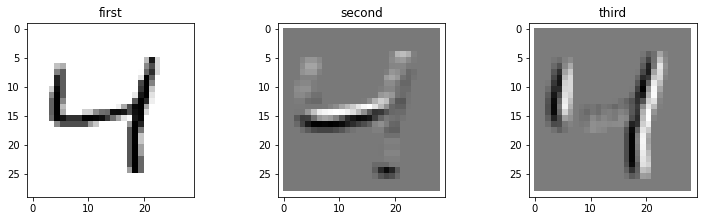

In [3]:
#합성곱 신경망 CNN
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_test/=255
num_classes=10
y_train=np_utils.to_categorical(y_train,num_classes)
y_test=np_utils.to_categorical(y_test,num_classes)

import matplotlib.pyplot as plt
%matplotlib inline
id_img=2
myfil1=np.array([[1,1,1],
                [1,1,1],
                [-2,-2,-2]],dtype=float) #A필터
myfil2=np.array([[-2,1,1],
                [-2,1,1],
                [-2,1,1]],dtype=float) #B필터
x_img=x_train[id_img,:,:,0]
img_h=28
img_w=28
x_img=x_img.reshape(img_h,img_w)
out_img1=np.zeros_like(x_img)
out_img2=np.zeros_like(x_img)

#필터처리
for ih in range(img_h-3):
    for iw in range(img_w-3):
        img_part=x_img[ih:ih+3,iw:iw+3]
        out_img1[ih+1,iw+1]=np.dot(img_part.reshape(-1),myfil1.reshape(-1))
        out_img2[ih+1,iw+1]=np.dot(img_part.reshape(-1),myfil2.reshape(-1))

#표시        
plt.figure(1,figsize=(12,3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()
plt.subplot(1,3,1)
plt.pcolor(1-x_img)
plt.title('first')
plt.xlim(-1,29)
plt.ylim(29,-1)
plt.subplot(1,3,2)
plt.pcolor(-out_img1)
plt.title('second')
plt.xlim(-1,29)
plt.ylim(29,-1)
plt.subplot(1,3,3)
plt.title('third')
plt.pcolor(-out_img2)
plt.xlim(-1,29)
plt.ylim(29,-1)
plt.show()

#first에서 second로 넘어가는 과정은 A필터를 사용해서 가로 라인의 아래쪽이 큰 값이 된다.
#second에서 third로 넘어가는 과정은 B필터를 사용한다. 세로 라인의 왼쪽이 큰 값을 갖는다. 


In [4]:
#CNN을 케라스로 구현한다.
import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation,Dropout,Flatten,Dense
from keras.optimizers import Adam
import time

model=Sequential()
model.add(Conv2D(8,(3,3),padding='same',input_shape=(28,28,1),activation='relu')) #Conv2D 8개의 3X3 필터 패딩을 추가해서 처리
#input_shape는 입력이미지의 크기, 흑백이기 때문에 마지막 인수를 1로 하고 있다. 컬러이미지일 경우는 3이다. 활성화 함수는 relu
model.add(Flatten()) #합성곱의 출력은 4차원으로 그 크기는 배치 수, 필터 수, 출력이미지의 세로폭, 출력이미지의 가로폭)으로 되어있다.
#이것을 다음 출력층에 넣으려면 2차원으로 해야한다. 이러한 변환은 flatten으로 한다.
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
startTime=time.time()
history=model.fit(x_train,y_train,batch_size=1000,epochs=20,verbose=1,validation_data=(x_test,y_test))
score=model.evaluate(x_test,y_test,verbose=0)
print('Test loss: ',score[0])
print('Test accuracy: ',score[1])
print("Computation Time:{0:.3f}sec".format(time.time()-startTime))

Epoch 1/20
60/60 [==============================] - 2s 38ms/step - loss: 0.8246 - accuracy: 0.7957 - val_loss: 0.3443 - val_accuracy: 0.9055
Epoch 2/20
60/60 [==============================] - 2s 37ms/step - loss: 0.3162 - accuracy: 0.9101 - val_loss: 0.2712 - val_accuracy: 0.9222
Epoch 3/20
60/60 [==============================] - 2s 38ms/step - loss: 0.2687 - accuracy: 0.9237 - val_loss: 0.2440 - val_accuracy: 0.9323
Epoch 4/20
60/60 [==============================] - 2s 38ms/step - loss: 0.2367 - accuracy: 0.9336 - val_loss: 0.2174 - val_accuracy: 0.9386
Epoch 5/20
60/60 [==============================] - 2s 39ms/step - loss: 0.2123 - accuracy: 0.9402 - val_loss: 0.1925 - val_accuracy: 0.9461
Epoch 6/20
60/60 [==============================] - 2s 39ms/step - loss: 0.1918 - accuracy: 0.9460 - val_loss: 0.1772 - val_accuracy: 0.9504
Epoch 7/20
60/60 [==============================] - 2s 39ms/step - loss: 0.1718 - accuracy: 0.9524 - val_loss: 0.1618 - val_accuracy: 0.9540
Epoch 8/20
60

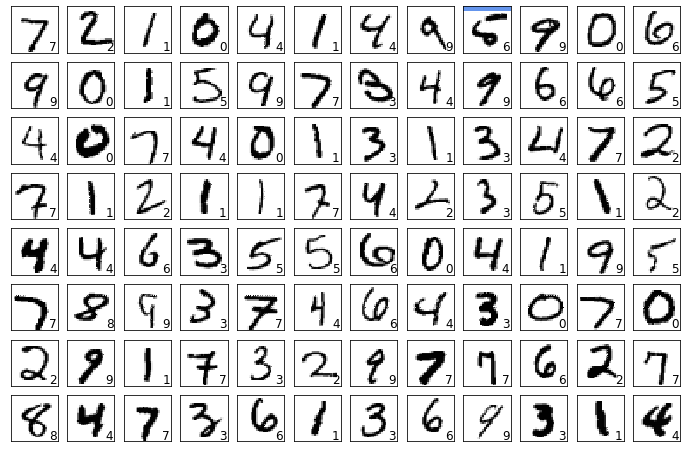

In [5]:
#예측을 해보자
def show_prediction():
    n_show=96
    y=model.predict(x_test)
    plt.figure(2,figsize=(12,8))
    plt.gray()
    for i in range(n_show):
        plt.subplot(8,12,i+1)
        x=x_test[i,:]
        x=x.reshape(28,28)
        plt.pcolor(1-x)
        wk=y[i,:]
        prediction=np.argmax(wk)
        plt.text(22,25.5,"%d" % prediction, fontsize=12)
        if prediction!=np.argmax(y_test[i,:]):
            plt.plot([0,27],[1,1],color='cornflowerblue',linewidth=5)
        plt.xlim(0,27)
        plt.ylim(27,0)
        plt.xticks([],"")
        plt.yticks([],"")
show_prediction()
plt.show()
#아래를 보면 잘못 인식한 것은 겨우 1개였다.

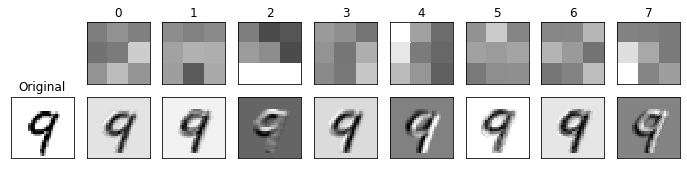

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1,figsize=(12,2.5))
plt.gray()
plt.subplots_adjust(wspace=0.2,hspace=0.2)
plt.subplot(2,9,10)
id_img=12
x_img=x_test[id_img,:,:,0]
img_h=28
img_w=28
x_img=x_img.reshape(img_h,img_w)
plt.pcolor(-x_img)
plt.xlim(0,img_h)
plt.ylim(img_w,0)
plt.xticks([],"")
plt.yticks([],"")
plt.title("Original")
w=model.layers[0].get_weights()[0]
max_w=np.max(w)
min_w=np.min(w)
for i in range(8):
    plt.subplot(2,9,i+2)
    w1=w[:,:,0,i]
    w1=w1.reshape(3,3)
    plt.pcolor(-w1,vmin=min_w,vmax=max_w)
    plt.xlim(0,3)
    plt.ylim(3,0)
    plt.xticks([],"")
    plt.yticks([],"")
    plt.title("%d" % i)
    plt.subplot(2,9,i+11)
    out_img=np.zeros_like(x_img)
    
    #필터처리
    for ih in range(img_h-3):
        for iw in range(img_w-3):
            img_part=x_img[ih:ih+3,iw:iw+3]
            out_img[ih+1,iw+1]=np.dot(img_part.reshape(-1),w1.reshape(-1))
    plt.pcolor(-out_img)
    plt.xlim(0,img_w)
    plt.ylim(img_h,0)
    plt.xticks([],"")
    plt.yticks([],"")
plt.show()
#2층 합성곱 네트워크와 학습에서 얻은 필터와 적용된 이미지     

In [9]:
#집대성한 네트워크
import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras.optimizers import Adam
import time

model=Sequential()
model.add(Conv2D(16,(3,3),input_shape=(28,28,1),activation='relu')) #합성곱 16장
model.add(Conv2D(32,(3,3),activation='relu')) #합성곱 32장
model.add(MaxPooling2D(pool_size=(2,2))) #풀링층 stride2
model.add(Conv2D(64,(3,3),activation='relu')) #합성곱 64장
model.add(MaxPooling2D(pool_size=(2,2))) #풀링층 stride2
model.add(Dropout(0.25)) #드롭아웃
model.add(Flatten()) #
model.add(Dense(128,activation='relu')) #전결합
model.add(Dropout(0.25)) #드롭아웃
model.add(Dense(num_classes,activation='softmax')) #출력

model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])

startTime=time.time()
history=model.fit(x_train,y_train,batch_size=1000,epochs=20,verbose=1,validation_data=(x_test,y_test))
score=model.evaluate(x_test,y_test,verbose=0)
print('Test loss:',score[0])
print('Test accuracy:',score[1])
print('Computation time:{0:.3f}sec'.format(time.time()-startTime))

Epoch 1/20
60/60 [==============================] - 27s 452ms/step - loss: 0.7765 - accuracy: 0.7651 - val_loss: 0.1601 - val_accuracy: 0.9512
Epoch 2/20
60/60 [==============================] - 27s 457ms/step - loss: 0.1565 - accuracy: 0.9527 - val_loss: 0.0723 - val_accuracy: 0.9767
Epoch 3/20
60/60 [==============================] - 27s 454ms/step - loss: 0.0933 - accuracy: 0.9711 - val_loss: 0.0509 - val_accuracy: 0.9834
Epoch 4/20
60/60 [==============================] - 27s 446ms/step - loss: 0.0727 - accuracy: 0.9783 - val_loss: 0.0402 - val_accuracy: 0.9867
Epoch 5/20
60/60 [==============================] - 27s 455ms/step - loss: 0.0612 - accuracy: 0.9812 - val_loss: 0.0335 - val_accuracy: 0.9881
Epoch 6/20
60/60 [==============================] - 27s 454ms/step - loss: 0.0522 - accuracy: 0.9840 - val_loss: 0.0320 - val_accuracy: 0.9889
Epoch 7/20
60/60 [==============================] - 27s 448ms/step - loss: 0.0459 - accuracy: 0.9861 - val_loss: 0.0288 - val_accuracy: 0.9911

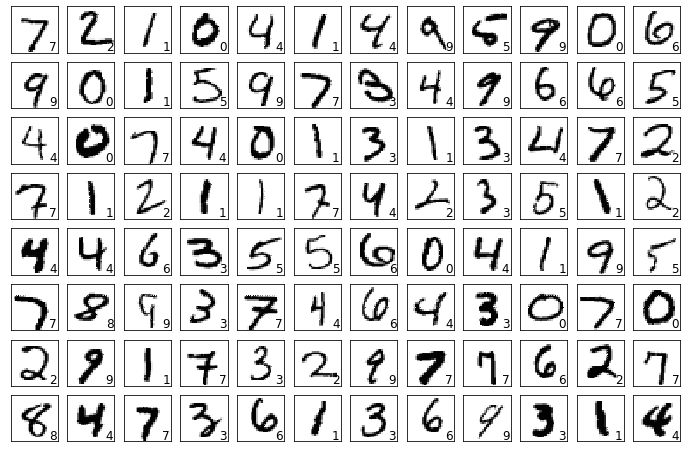

In [10]:
show_prediction()
plt.show()
#완벽하게 다 맞췄다...!

In [ ]:
#결론
#이미지 처리에 있어서 결국 다층 퍼셉트론을 사용하여 학습을 시키는 것 보다 합성곱 신경망을 사용하고 규제를 적용한 모델을 만들어
#학습된 데이터로 validation까지 수행하는데 문제가 없도록 좋은 일반화를 만들 수 있다. 